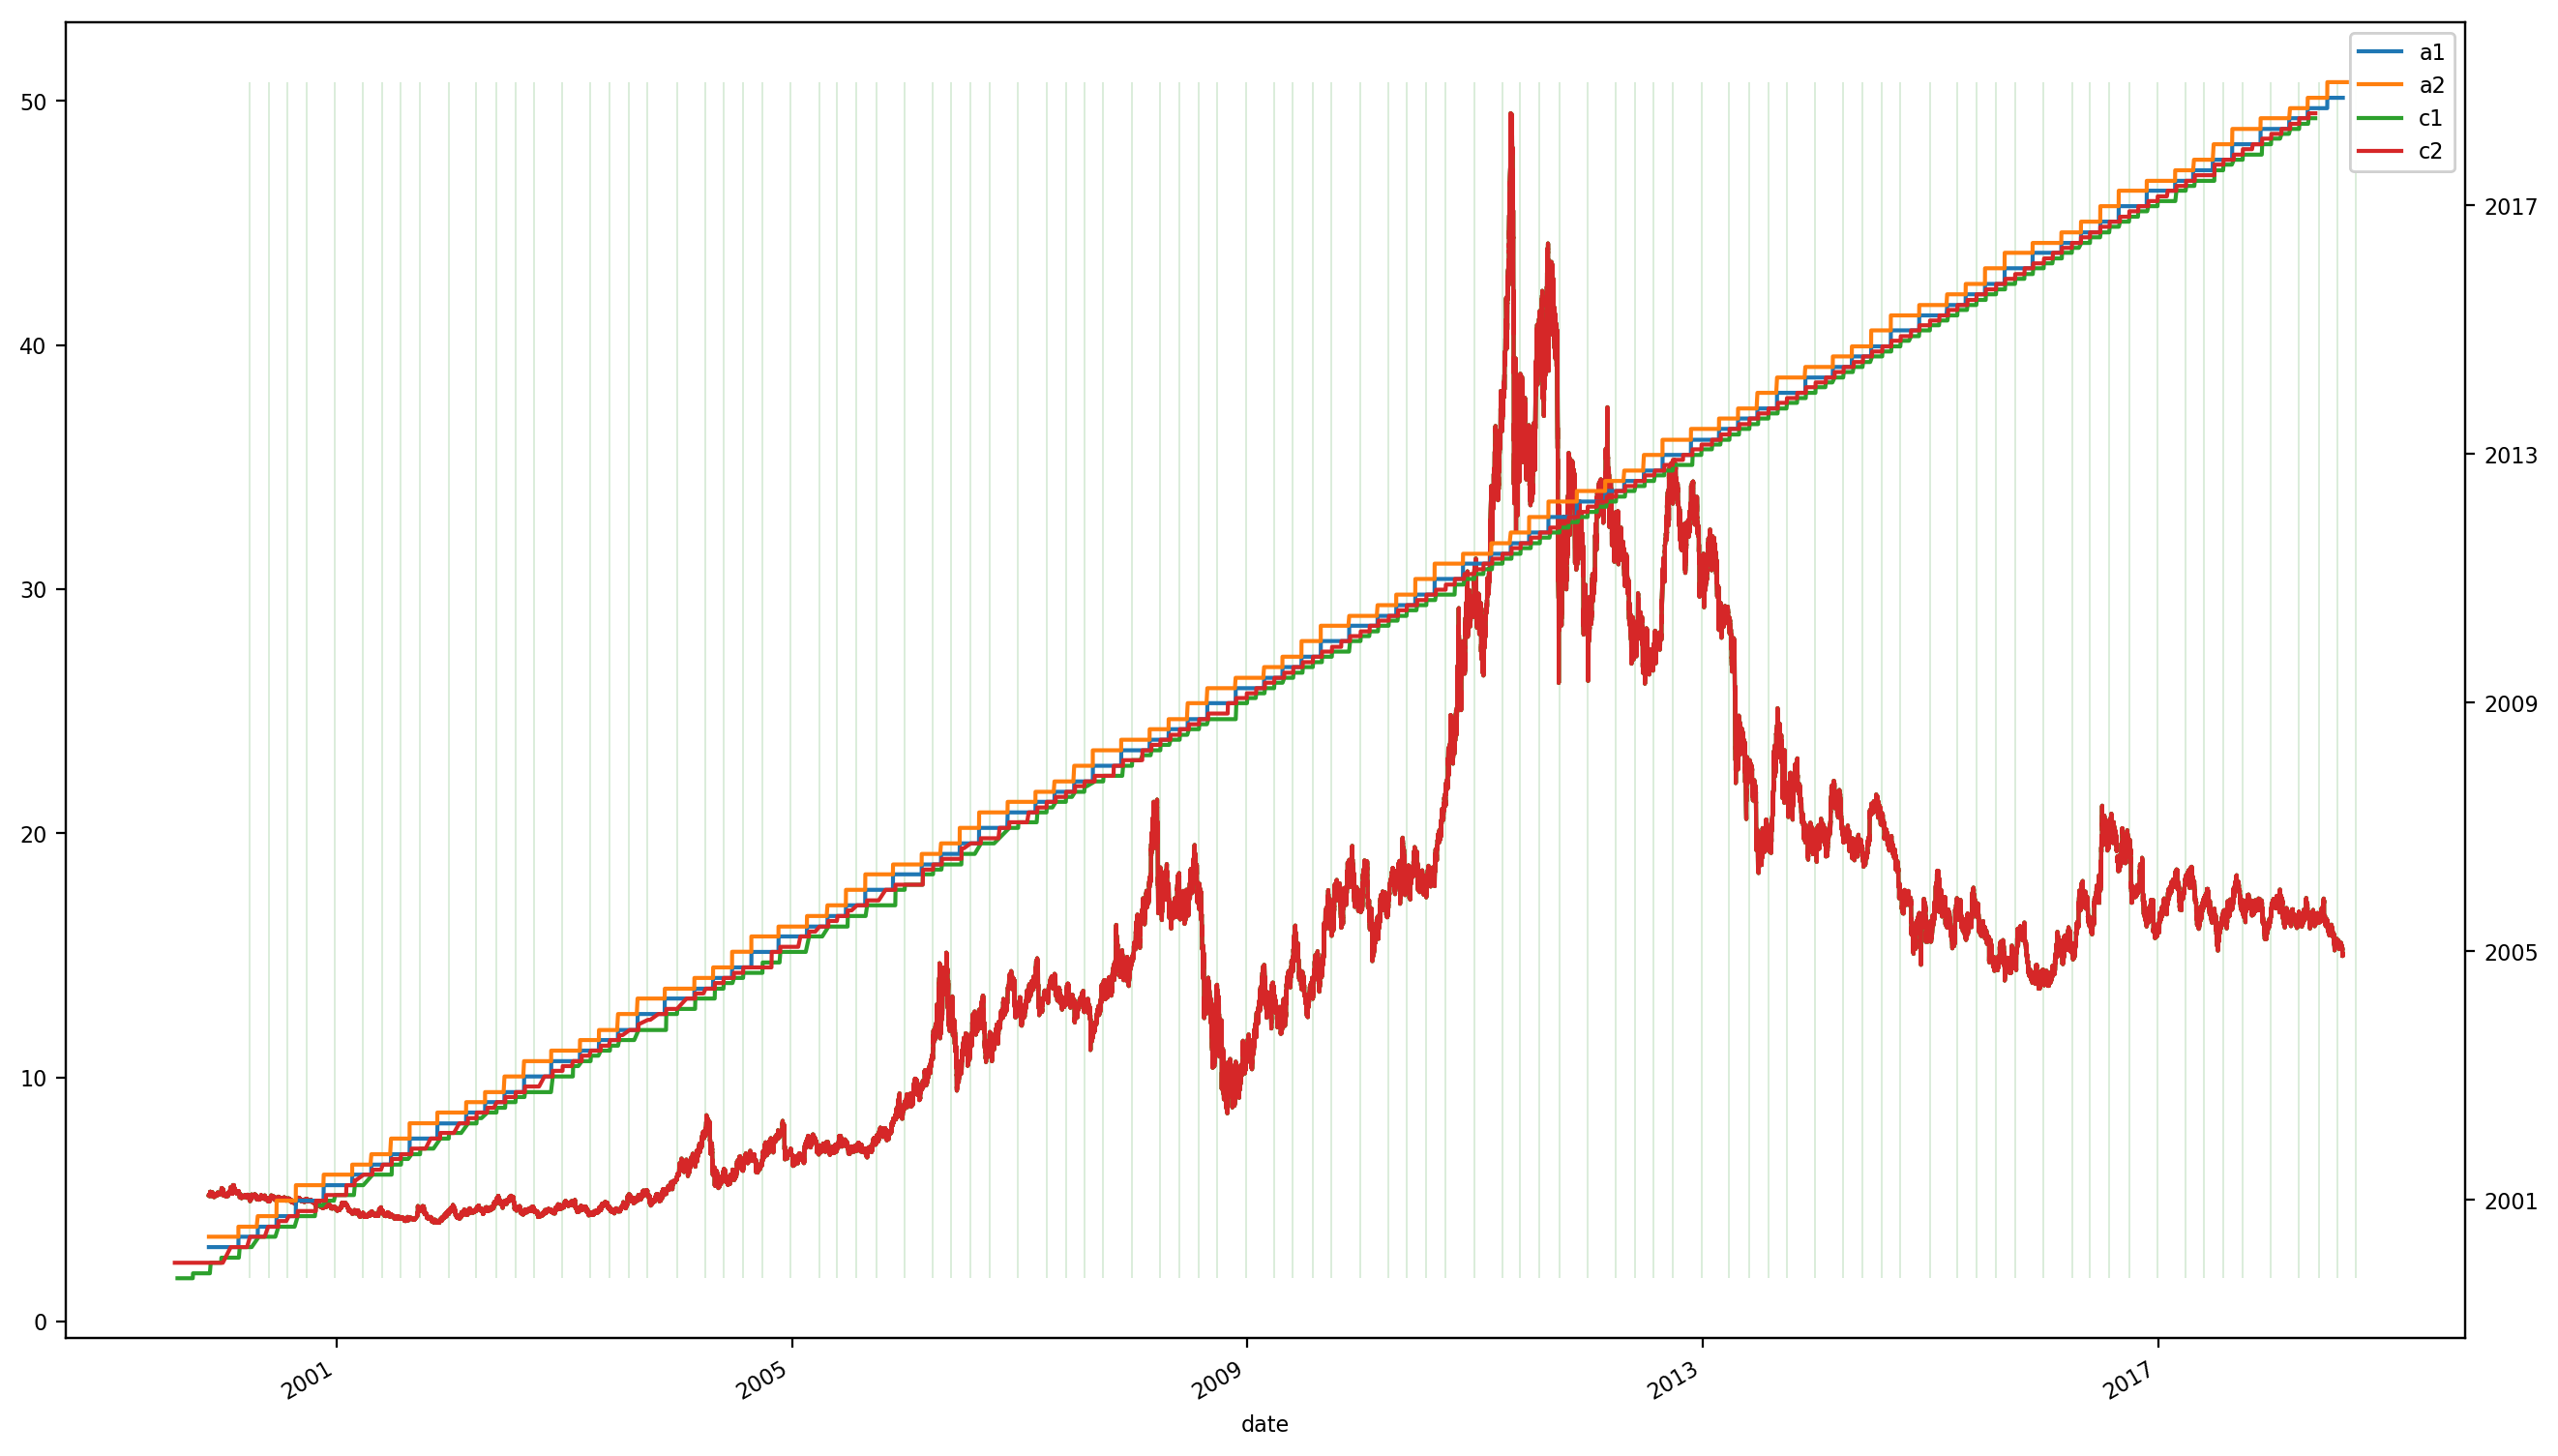

In [2]:
#%config InlineBackend.figure_format = 'retina'
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('retina')

mkt='SI'
a1 = pd.read_csv('/Users/xren/Downloads/%s-a1.csv'%mkt, parse_dates=['date', 'exp']);a1.name = 'a1'
a2 = pd.read_csv('/Users/xren/Downloads/%s-a2.csv'%mkt, parse_dates=['date', 'exp']);a2.name = 'a2'
a2.price = winsorize(a2.price, limits=.01)
c1 = pd.read_csv('/Users/xren/Downloads/%s-c1.csv'%mkt, parse_dates=['date', 'exp']);c1.name = 'c1'
c2 = pd.read_csv('/Users/xren/Downloads/%s-c2.csv'%mkt, parse_dates=['date', 'exp']);c2.name = 'c2'

ax = None
for df in [a1,a2,c1,c2]:
    ax = a1.plot(x='date', y='price', figsize=(16,10), label=df.name, ax=ax)
ymin, ymax = ax.get_ylim()
ax.vlines(x=a1.exp.unique(), ymin=ymin, ymax=ymax-1, color='g', lw=.1)

ax2 = ax.twinx()
for df in [a1,a2,c1,c2]:
    df.plot(x='date', y='exp', figsize=(16,10), label=df.name, ax=ax2)


Text(0,0.5,'Days')

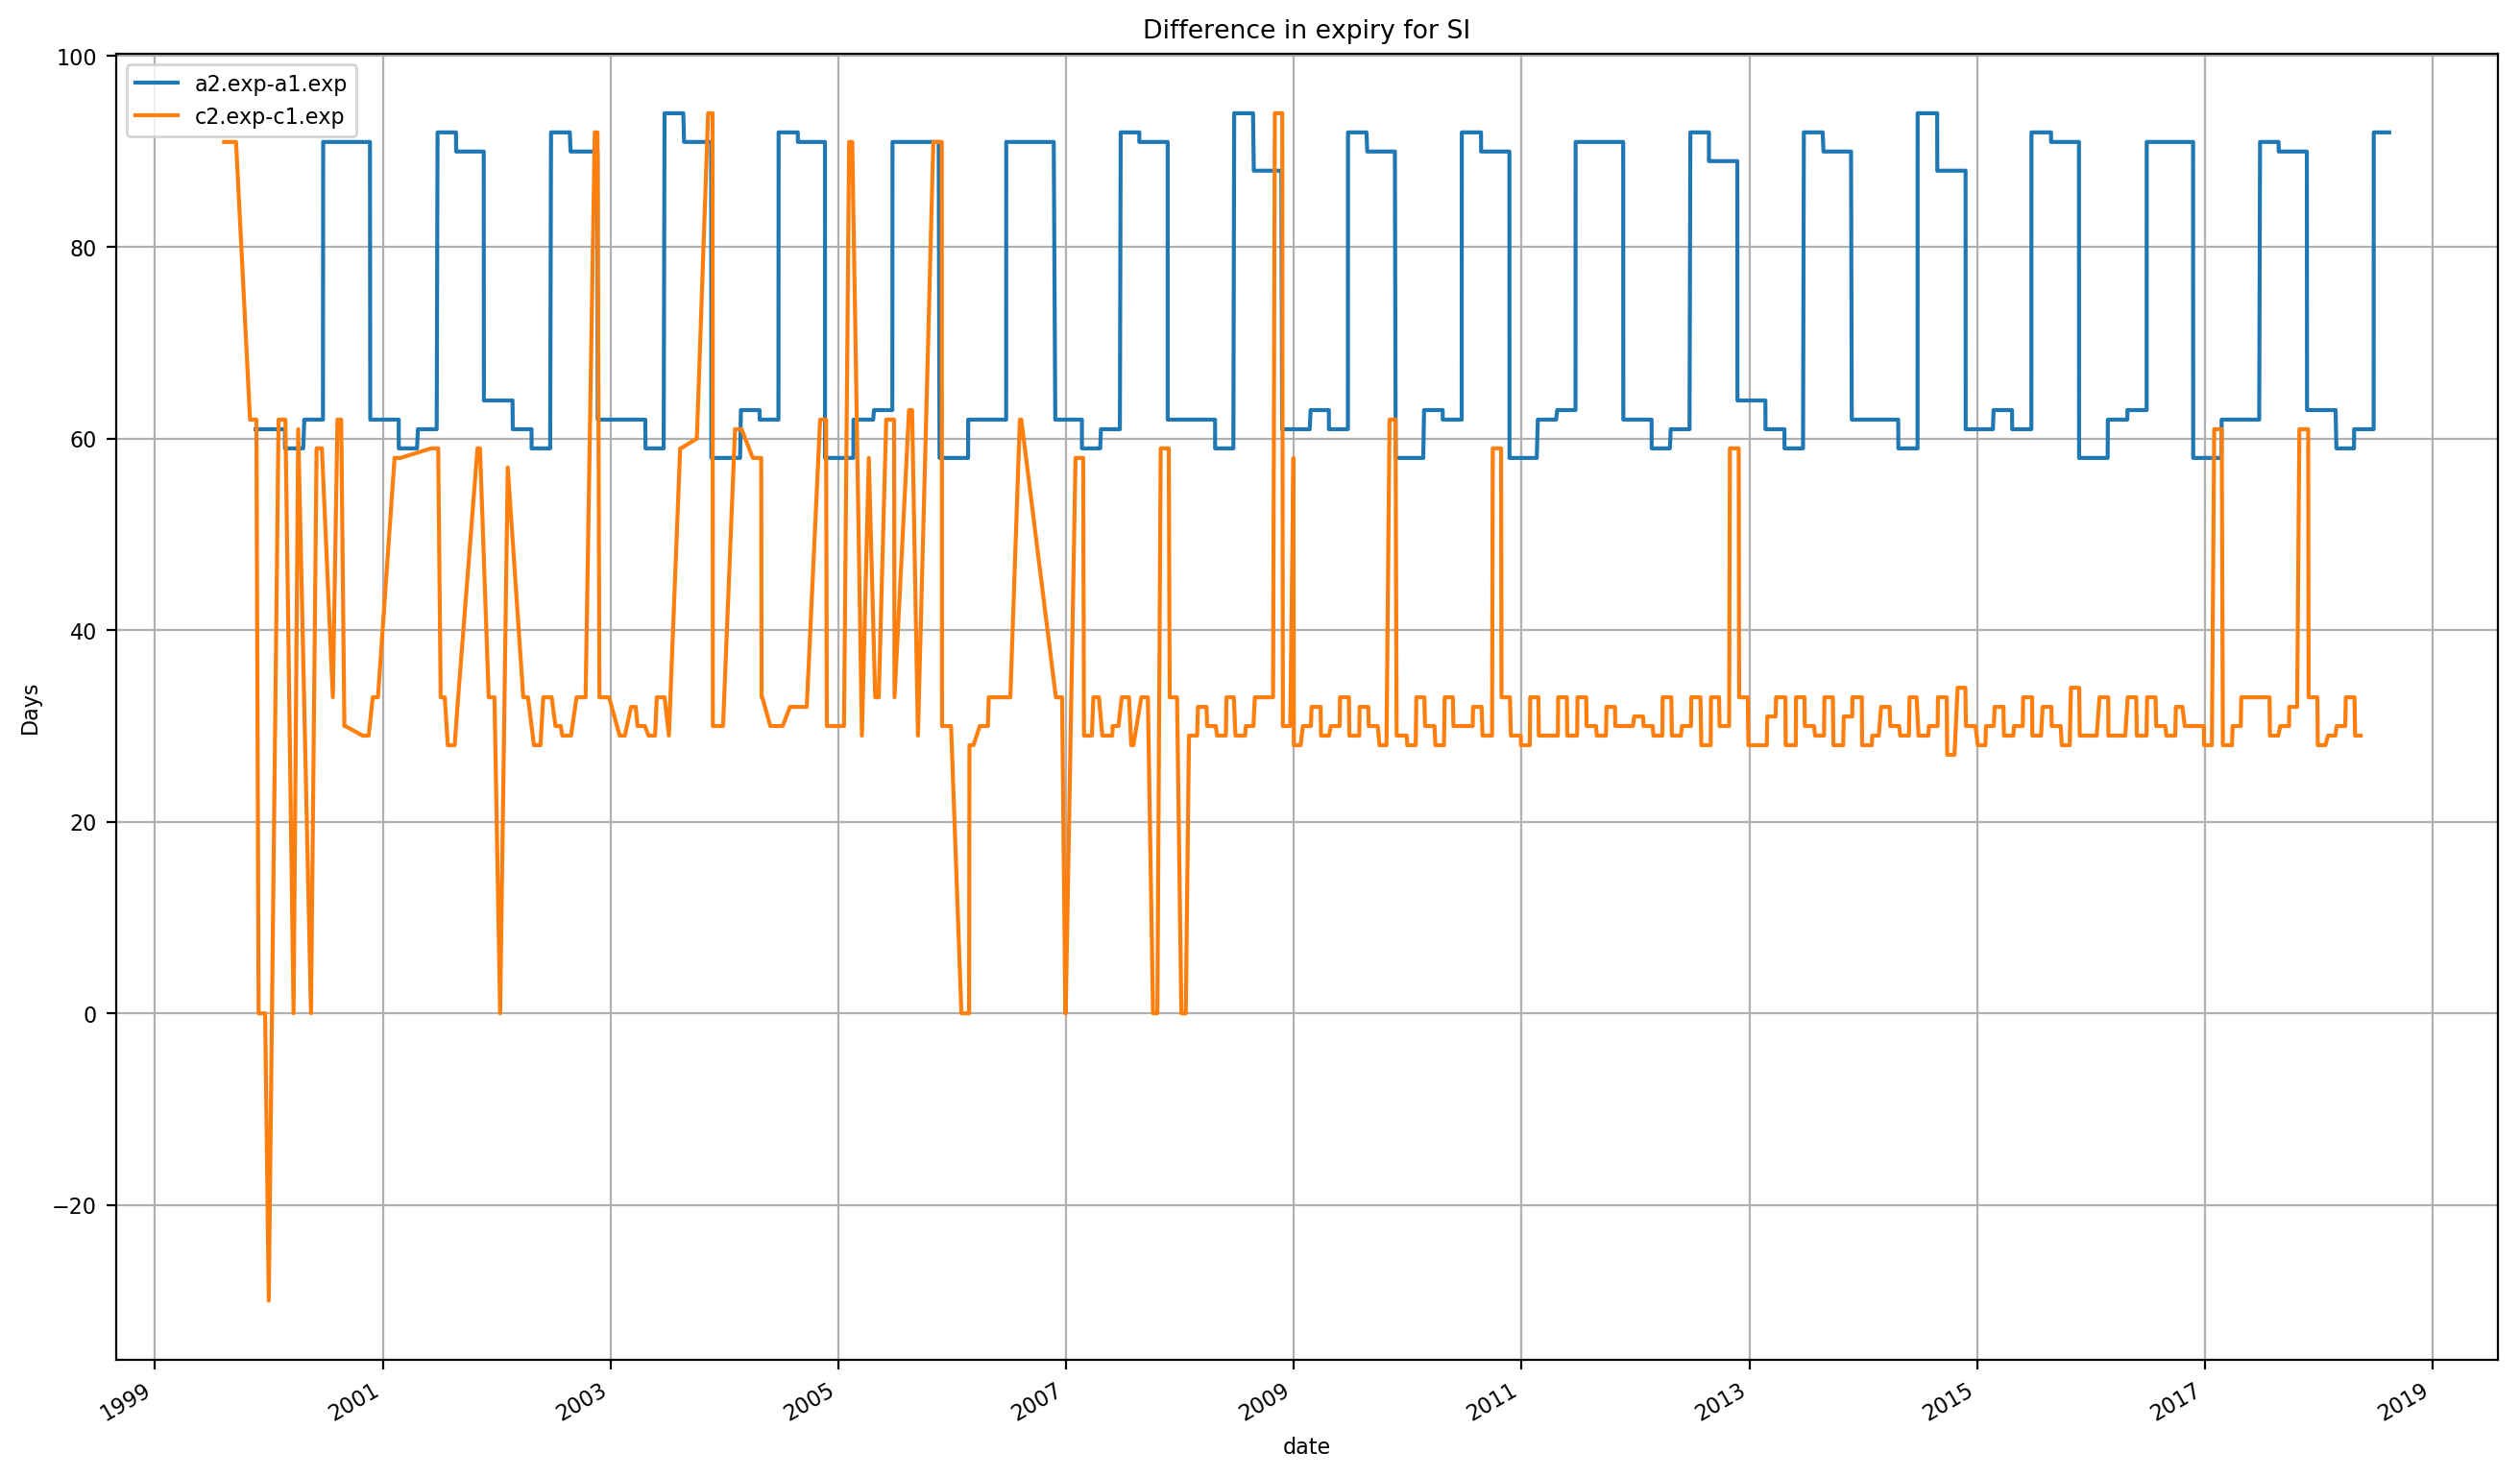

In [3]:
ax = (a2.set_index('date').exp-a1.set_index('date').exp).dt.days.dropna().plot(figsize=(16,10),
                                                                          legend=True, label='a2.exp-a1.exp',
                                                                            title='Difference in expiry for %s'%mkt)
(c2.set_index('date').exp-c1.set_index('date').exp).dt.days.dropna().plot(ax = ax, 
                                                                          label='c2.exp-c1.exp', legend=True, 
                                                                          grid=True)
ax.set_ylabel("Days")



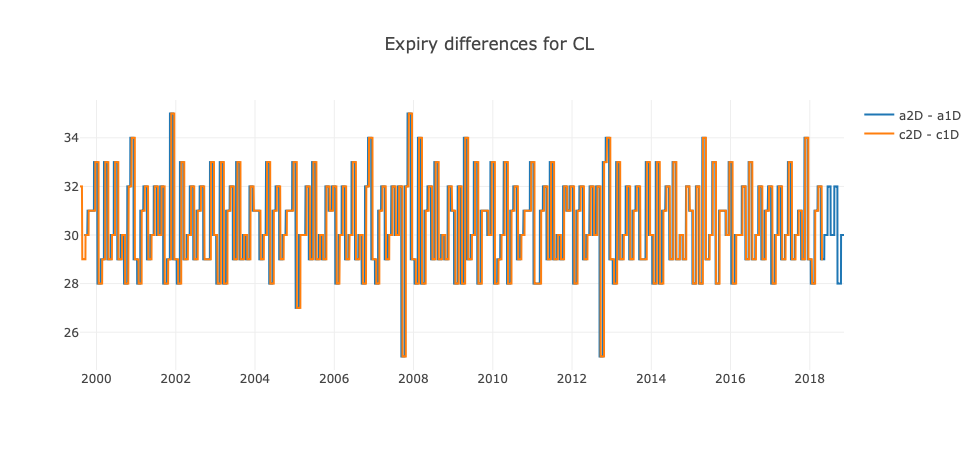

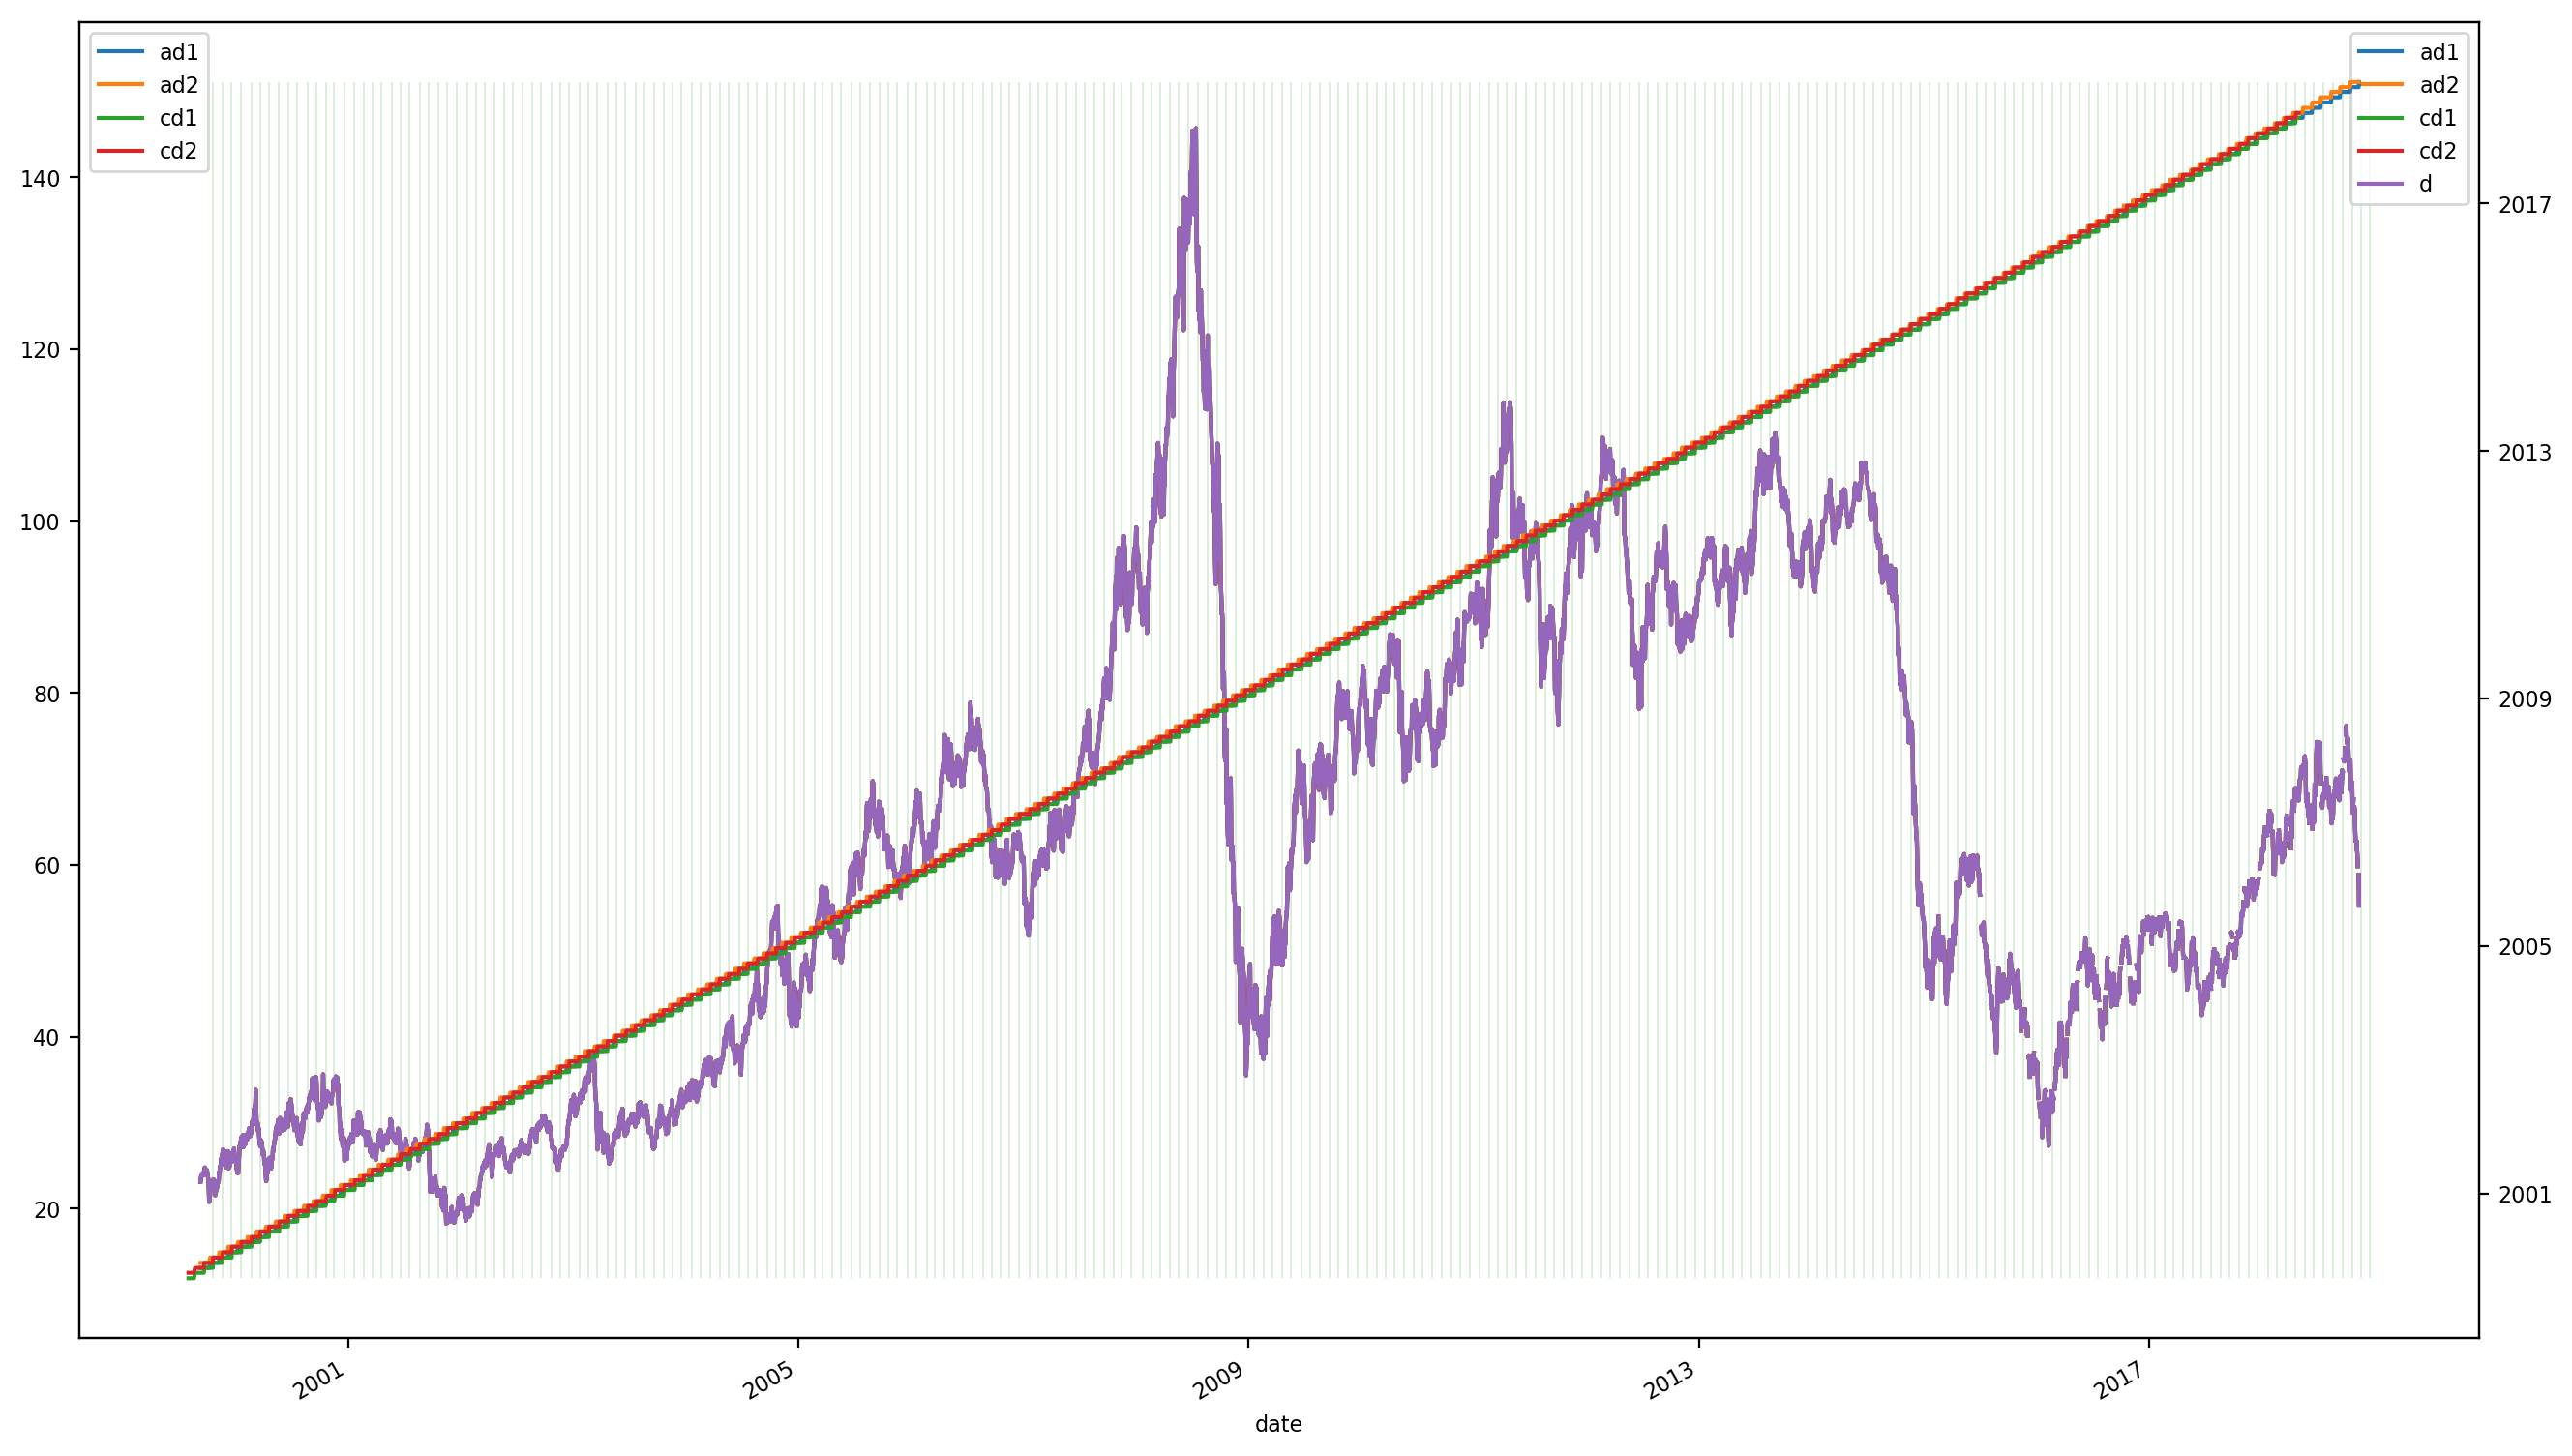

In [7]:
mkt='CL'
ad1 = pd.read_csv('/Users/xren/Downloads/%sa1-D.csv'%mkt, parse_dates=['date', 'exp']);ad1.name = 'ad1'
ad2 = pd.read_csv('/Users/xren/Downloads/%sa2-D.csv'%mkt, parse_dates=['date', 'exp']);ad2.name = 'ad2'
ad2.price = winsorize(ad2.price, limits=.01)
cd1 = pd.read_csv('/Users/xren/Downloads/%sc1-D.csv'%mkt, parse_dates=['date', 'exp']);cd1.name = 'cd1'
cd2 = pd.read_csv('/Users/xren/Downloads/%sc2-D.csv'%mkt, parse_dates=['date', 'exp']);cd2.name = 'cd2'
d  = pd.read_csv('/Users/xren/Downloads/%s-D.csv'%mkt, parse_dates=['date', 'exp']);d.name = 'd'


ax = None
for df in [ad1,ad2,cd1,cd2,d]:
    ax = ad1.plot(x='date', y='price', figsize=(16,10), label=df.name, ax=ax)
ymin, ymax = ax.get_ylim()
ax.vlines(x=ad1.exp.unique(), ymin=ymin, ymax=ymax-1, color='g', lw=.1)

ax2 = ax.twinx()
for df in [ad1,ad2,cd1,cd2]:
    df.plot(x='date', y='exp', figsize=(16,10), label=df.name, ax=ax2)

dexp_a = (ad2.set_index('date').exp-ad1.set_index('date').exp).dt.days.dropna()
dexp_c = (cd2.set_index('date').exp-cd1.set_index('date').exp).dt.days.dropna()

iplot(go.Figure(data=[
                        go.Scatter(x=dexp_a.index, y=dexp_a.values, name='a2D - a1D'),
                        go.Scatter(x=dexp_c.index, y=dexp_c.values, name='c2D - c1D'),
                    ], 
                layout=go.Layout(showlegend=True, title='Expiry differences for %s'%mkt)))

    
#ax = pd.DataFrame([], columns=['a2D - a1D']).plot(
#    figsize=(16,10),legend=True,label='ad2.exp-ad1.exp',title='Difference in expiry for %s'%mkt)
#pd.DataFrame((cd2.set_index('date').exp-cd1.set_index('date').exp).dt.days.dropna()).plot(
#    ax = ax, label='cd2.exp-cd1.exp', legend=True, grid=True)
#ax.set_ylabel("Days")

In [ ]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"